# EXERCISE 2B

Imagine you are a data scientist working for an international development organization. Your team wants to understand how countries differ in terms of economy, health, and social well-being. You have access to a dataset containing multiple indicators for countries worldwide, such as GDP per capita, life expectancy, child mortality, and population.

Your task is to discover natural groupings of countries using hierarchical clustering. By examining these clusters, you can identify patterns such as:

- Which countries are economically developed or developing

- How social and health indicators vary across regions

- Surprising similarities between countries from different continents

Answer each question by completing the corresponding code cell. **Do not remove or reorder cells.**


In [107]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("rohan0301/unsupervised-learning-on-country-data")

print("Path to dataset files:", path)

if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

Using Colab cache for faster access to the 'unsupervised-learning-on-country-data' dataset.
Path to dataset files: /kaggle/input/unsupervised-learning-on-country-data
True


## 1. Import Required Libraries
Import the core libraries needed for data analysis, visualization, and clustering.

In [108]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.metrics import silhouette_score
from scipy.spatial import distance # To calculate distances
from google.colab import files
from IPython.display import Image
import scipy.cluster.hierarchy as sch

## 2. Load the Dataset
Upload the CSV file for *the* **Country Data** dataset.

In [109]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rohan0301/unsupervised-learning-on-country-data")

print("Path to dataset files:", path)

if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)


Using Colab cache for faster access to the 'unsupervised-learning-on-country-data' dataset.
Path to dataset files: /kaggle/input/unsupervised-learning-on-country-data
True


## 3. Exploring the Dataset

Display the first 10 rows of the dataset `(5 pts)`

- Show the initial records to understand the dataset's structure and variables.

In [110]:
df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


Display the shape of the dataset `(5 pts)`
- How many rows (countries) and how many features does the dataset contain?

In [111]:
print(df.shape)

(167, 10)


Show summary statistics using `describe()`. `(5 pts)`

In [112]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Check for missing values. `(5 pts)`

In [113]:
df.isnull().sum()

,0
country,0
child_mort,0
exports,0
health,0
imports,0
income,0
inflation,0
life_expec,0
total_fer,0
gdpp,0


## 4. Data Preprocessing

Select only the numerical columns for clustering `(5 pts)`
- Exclude any non-numeric fields, such as 'Country Name' or categorical variables.

In [114]:
numerical_df = df.drop('country', axis=1)
display(numerical_df.head())

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


Standardize the selected numerical features `(5 pts)`

- This ensures all features contribute equally to the distance calculations used in clustering.

In [115]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_df)

scaled_df = pd.DataFrame(scaled_data, columns=numerical_df.columns)
display(scaled_df.head())

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


## 5. Exploratory Data Analysis

Generate a correlation heatmap
- Visualize the relationships between socioeconomic indicators. `(10 pts)`

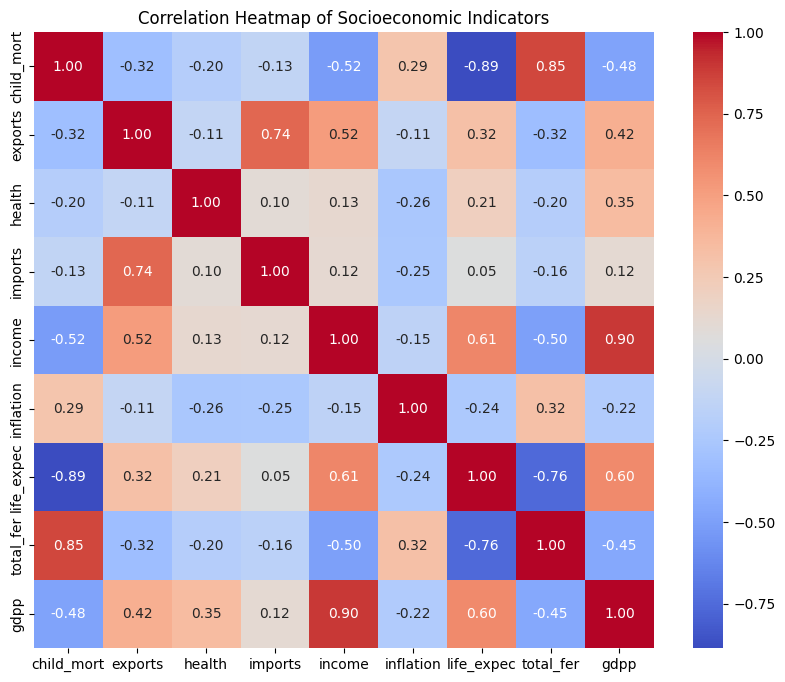

In [116]:
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Socioeconomic Indicators')
plt.show()

Identify 2–3 variables that appear strongly correlated `(10 pts)`
- Explain your observations in the text cell below.

exports, life_expec, and gdpp

**exports** would determine the countries with resources capable of sustaining its citizens and economy and its abundance to export such resources.

**life_expec** would determine the countries that have a sustainable quality of life.

**gdpp** would simply determine how much resources a country would create.



## 6. Hierarchical Clustering

Compute and display a dendrogram using the linkage method `(10 pts)`
- Use `'ward'` linkage to minimize variance within clusters.

In [ ]:
Z = sch.linkage(scaled_df[['gdpp','life_expec','exports']], method = 'ward') # Use same features as 3D plot
plt.figure(figsize=(20,7))
den = sch.dendrogram(Z)
plt.title('Dendrogram (Ward Linkage) for GDPP, Life Expectancy, and Exports')
plt.xlabel('Data Points Number')
plt.ylabel('Euclidean distance in the space with other variables')

Text(0, 0.5, 'Euclidean distance in the space with other variables')

Based on the dendrogram, choose a reasonable number of clusters `(5 pts)`
- Write your chosen number below and explain your reasoning.

4 clusters. Since this would allow for distinct groupings of countries while maintaining interpretability.

Perform Agglomerative Clustering using your chosen cluster count `(10 pts)`
- Attach the cluster labels back to the original dataframe.

In [ ]:
cluster_H = AgglomerativeClustering(n_clusters=4, linkage= 'average')
# Model Fit
model_clt = cluster_H.fit(scaled_df[['gdpp','income','life_expec']])

# Attach cluster labels to the original dataframe
df['clusters'] = model_clt.labels_
print('Clusters assigned to each datapoints, cluster = 2:')
print(df['clusters'].value_counts())

## 7. Visualizing Cluster Results

Create a scatter plot using any 2 meaningful features, colored by cluster `(10 pts)`
- Choose variables that make socioeconomic sense (e.g., GDP per capita vs. life expectancy).

In [ ]:
plt.scatter(df[['gdpp']], df[['life_expec']])
plt.xlabel('GDPP')
sns.scatterplot(x='gdpp', y='life_expec', hue='clusters', data=df, palette='tab10')
plt.xlabel('GDPP')
plt.ylabel('Life Expectancy')
plt.title('GDPP VS. LIFE EXPECTANCY')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

X_3d = df[['gdpp', 'life_expec', 'exports']]

cluster_agg = AgglomerativeClustering(n_clusters=4, linkage='ward')
pred_agg = cluster_agg.fit_predict(X_3d)
print(pred_agg)

# Frequency count of the Output clusters
unique, counts = np.unique(pred_agg, return_counts=True)
dict_counts = dict(zip(unique, counts))
print(dict_counts)

print(numerical_df.head(10))

In [ ]:
import plotly.express as px

fig = px.scatter_3d(X_3d, x='gdpp', y='life_expec', z='exports', color = pred_agg)
fig.show()

# Describe the characteristics of each cluster `(5 pts)`
- What patterns can you infer about country groupings?

Here are the characteristics of each cluster based on the Agglomerative Clustering (4 clusters) using GDP per capita, Life Expectancy, and Exports:

### Cluster Analysis:

*   **Cluster 0 (Moderate Development):** This cluster consists of countries with moderate GDP per capita (4,142), moderate life expectancy (66 years), and moderate export activity (33%). These countries likely represent emerging economies or lower-middle-income nations still in the process of development.

*   **Cluster 1 (Developed Economies):** Countries in this cluster exhibit high GDP per capita (42,805), high life expectancy (78 years), and significant export levels (48%). This group generally includes developed nations with established economies and strong social indicators.

*   **Cluster 2 (Highly Developed, Export-Oriented):** This is a very distinct and small cluster characterized by exceptionally high GDP per capita (105,000), very high life expectancy (81.6 years), and extremely high export activity (200%). These are likely highly specialized, wealthy, and export-driven economies, possibly including small nations with unique economic advantages.

*   **Cluster 3 (Least Developed/Low Income):** This cluster includes countries with low GDP per capita (1,149), low life expectancy (~59.6 years), and relatively low export activity (24%). These characteristics are typical of least developed countries or low-income nations facing significant development challenges.







## 8. Reflection
Write a short reflection on what socioeconomic insights hierarchical clustering revealed about global development patterns. `(10 pts)`


Hierarchical clustering provides a powerful visual and analytical tool to understand global development patterns. The analysis revealed distinct groupings of countries based on key socioeconomic indicators like GDP per capita, life expectancy, and exports. We observed a clear stratification:

*   **Developed vs. Developing Divide:** The clustering distinctly separated highly developed, wealthy nations (like those in Cluster 1 and 2) characterized by high GDP, long life expectancies, and robust export economies, from least developed countries (Cluster 3) struggling with low GDP, high child mortality (implied by low life expectancy), and limited economic integration.
*   **Emerging Economies:** Cluster 0 represented a group of countries with moderate development indicators, suggesting a segment of emerging economies that are neither fully developed nor among the least developed. This highlights a dynamic middle ground in global development.
*   **Niche Economies:** The small but highly affluent Cluster 2, with exceptionally high exports and GDP, points to specialized or resource-rich economies that achieve high development through unique economic structures, often small nations.

Overall, hierarchical clustering visually confirms a multi-layered global economy and provides a data-driven way to categorize countries, offering insights into the disparities and commonalities in their development journeys.